# 1. 집값 데이터 읽기

In [1]:
import numpy as np

import pandas as pd
data = pd.read_csv('house_price.txt', names=['size','price'])
print data

X = data['size']   # 제곱미터(평)
y = data['price']  # 억원
m = len(data)      # 정보 개수(행 개수)

         size  price
0   27.575758   6.10
1   26.969697   3.80
2   36.969697   5.70
3   13.636364   1.80
4   56.969697  13.00
5   29.090909   6.20
6   80.303030  12.00
7   51.515152   9.00
8   34.848485   5.30
9   18.484848   1.70
10  30.909091   3.80
11  33.939394   5.80
12  26.060606   3.70
13  32.424242   8.50
14  32.121212   4.70
15  31.818182   4.70
16  30.909091   6.00
17  36.969697   5.00
18  32.424242   6.50
19  33.030303   6.50
20  27.575758   7.00
21  20.000000   2.70
22  25.454545   8.60
23  31.818182   6.20
24  32.424242   5.80
25  32.424242   8.19
26  28.484848   5.09
27  32.424242   8.00
28  37.272727   6.10
29  25.757576   5.90
30  23.333333   6.00
31  31.515152   7.20
32  33.333333   8.50
33  19.393939   3.90
34  33.030303   8.50
35  20.909091   2.50
36  33.636364   5.00
37  21.212121   2.35
38  30.606061   3.30
39  30.909091   4.50
40  29.393939   3.50
41  57.878788   6.30
42  30.909091   4.09
43  18.787879   2.20
44  28.181818   5.20
45  30.606061   3.30
46  21.212121

In [2]:
# numpy array 형태로 변환, 형태 변환(m) -> (m,1)
X = (np.array(X)).reshape(m,1)
y = (np.array(y)).reshape(m,1)
print X.shape, y.shape

(52, 1) (52, 1)


# 2. 그래프 그리기

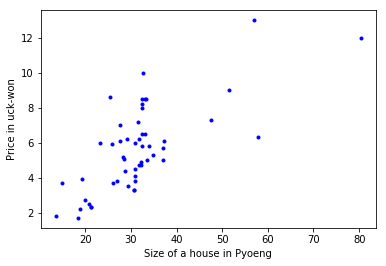

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'b. ')
plt.xlabel("Size of a house in Pyoeng") # 집 크기(평)
plt.ylabel("Price in uck-won")          # 매매가(억원)
plt.show()

# 3. Gradient descent -> theta

In [5]:
X_b = np.c_[np.ones((m, 1)), X] # 모든 샘플에 x0=1을 추가
# c_ : concatenation. 배열을 옆으로 붙이기

learning_rate = 0.0001 # 학습률(learning rate)
n_iter = 200

theta = np.zeros((2,1))
gradients = np.zeros((2,1))

for i in range(n_iter):
    gradients = np.dot(X_b.T,X_b.dot(theta)-y)/m
    theta = theta - learning_rate * gradients
print "theta:"
print theta

theta:
[[0.00642125]
 [0.17560879]]


# 4. 집 크기 최소(10평)~최대(90평) * theta -> 그래프 그리기

In [6]:
X_new = np.array([[10], [90]]) # 10-90평
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 x0=1을 추가
y_predict = X_new_b.dot(theta)
print "10평과 90평 집의 예측 가격"
print y_predict

10평과 90평 집의 예측 가격
[[ 1.76250917]
 [15.81121253]]


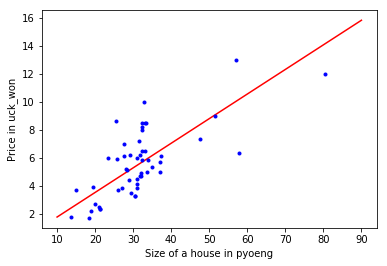

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel("Size of a house in pyoeng") # 집 크기(10평)
plt.ylabel("Price in uck_won") # 매매가(억원)
plt.show()

# 5. 임의의 집 크기(x_my)에 대한 집값 예측하기

In [8]:
X_mine = np.array([[25]]) # 우리집이 25평이라면 얼마일까?
X_mine_b = np.c_[np.ones((1,1)), X_mine] # 모든 샘플에 x0=1을 추가
y_predict = X_mine_b.dot(theta)
print y_predict, "억원"

[[4.39664105]] 억원


# 6. (Optional) '3.Gradient descent' 대신, 확률적 경사 하강법 함수 호출하여 theta 구하기

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=100, penalty=None, eta0=0.0001) # eta0(learning rate)
sgd_reg.fit(X, y.ravel()) # sgd_reg.fit(X, y.ravel()) # 1차원 배열로 만들기 (m,1) -> (m)

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=100, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

theta:
[0.01132627] [0.1745273]


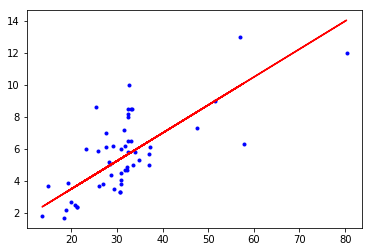

In [10]:
print "theta:"
print sgd_reg.intercept_, sgd_reg.coef_

y_pred = sgd_reg.predict(X)
plt.plot(X, y, 'b. ')
plt.plot(X, y_pred, 'r')
plt.show()

In [11]:
y_pred = sgd_reg.predict([[25]])
print y_pred, '억원'

[4.37450878] 억원
